In [ ]:
# !pip install gym
# !pip install pygame
# ! pip install matplotlib


# https://www.gymlibrary.ml/environments/classic_control/cart_pole/?highlight=cart+pole

In [9]:
import gym
import numpy as np 
import matplotlib.pyplot as plt
import time

In [10]:
env = gym.make('CartPole-v1')
print(env.observation_space.low,"\n",env.observation_space.high)

[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38] 
 [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]


In [11]:
action_space = 2 # number of possible actions
bin_size = 4
infinity_linspace_limit = 4

overe0 = float(4)
overe1 = float(4)/2**1
overe2 = float(4)/2**2
overe3 = float(4)/2**3
overe4 = float(4)/2**4
overe5 = float(4)/2**5
overe6 = float(4)/2**6

lin_space = [-overe0, -overe1, -overe2, -overe3, -overe4, -overe5, -overe6, 0, overe6, overe5, overe4, overe3, overe2, overe1, overe0]

def Qtable(state_space,action_space,bin_size = 15):

    bins = [np.linspace(-2.4,2.4,bin_size),
            lin_space,
            np.linspace(-0.2095,0.2095,bin_size),
            lin_space]
    # bins = [np.linspace(-2.4,2.4,bin_size),
    #         np.linspace(-infinity_linspace_limit,infinity_linspace_limit,bin_size),
    #         np.linspace(-0.2095,0.2095,bin_size),
    #         np.linspace(-infinity_linspace_limit,infinity_linspace_limit,bin_size)]
    
    q_table = np.random.uniform(low=-1,high=1,size=([len(bins[0]), len(bins[1]), len(bins[2]), len(bins[3])] + [action_space]))

    return q_table, bins

def Discrete(state, bins):
    index = []
    for i in range(len(state)): index.append(np.digitize(state[i],bins[i]) - 1)
    return tuple(index)

In [12]:
def epsilon_greedy_policy(state, Q, epsilon=0.1):
    explore = np.random.binomial(1, epsilon)
    if explore:
        action = env.action_space.sample()
        # print('explore')
    else:
        action = np.argmax(Q[state])
        # print('exploit')
    return action
    
def Q_learning(q_table, bins, episodes = 5000, gamma = 0.95, lr = 0.1, timestep = 5000, epsilon = 0.2):
    rewards = 0
    solved = False 
    steps = 0 
    runs = [0]
    data = {'max' : [0], 'avg' : [0]}
    start = time.time()
    ep = [i for i in range(0,episodes + 1,timestep)] 

    
    for episode in range(1,episodes+1):
        
        current_state = Discrete(env.reset(),bins) # initial observation
        score = 0
        done = False
        # temp_start = time.time()
        
        while not done:
            steps += 1 
            ep_start = time.time()
            # if episode%timestep == 0:
            #     env.render()
                
            action = epsilon_greedy_policy(current_state, q_table, epsilon)
            # if np.random.uniform(0,1) < epsilon:
            #     action = env.action_space.sample()
            #     print('explore')
            # else:
            #     action = np.argmax(q_table[current_state])
            #     print('exploit')
            
            obs, reward, done, info = env.step(action)
            # print('->', current_state, action, reward, obs, done, info)
            next_state = Discrete(obs,bins)

            # if observation[0] > 2.4 or observation[0] < -2.4 or observation[2] > 0.2095 or observation[2] < -0.2095:
            #     reward = 0

            score += reward
            
            if not done:
                max_future_q = np.max(q_table[next_state])
                current_q = q_table[current_state+(action,)]
                new_q = (1-lr)*current_q + lr*(reward + gamma*max_future_q)
                q_table[current_state+(action,)] = new_q

            current_state = next_state
            
        # End of the loop update
        else:
            rewards += score
            runs.append(score)
            #if score > 475 and steps >= 100 and solved == False: # considered as a solved:
            if score > 500 and solved == False: # considered as a solved:
                solved = True
                print('Solved in episode : {} in time {}'.format(episode, (time.time()-ep_start)))
        
        # Timestep value update
        if episode%timestep == 0:
            print('Episode : {} | Reward -> {} | Max reward : {} | Time : {}'.format(episode,rewards/timestep, max(runs), time.time() - ep_start))
            data['max'].append(max(runs))
            data['avg'].append(rewards/timestep)
            if rewards/timestep >= 475: 
                print('Solved in episode : {}'.format(episode))
            rewards, runs= 0, [0] 
            
    if len(ep) == len(data['max']):
        plt.plot(ep, data['max'], label = 'Max')
        plt.plot(ep, data['avg'], label = 'Avg')
        plt.xlabel('Episode')
        plt.ylabel('Reward')
        plt.legend(loc = "upper left")
        
    env.close()

Episode : 1000 | Reward -> 25.105 | Max reward : 136.0 | Time : 9.72747802734375e-05
Episode : 2000 | Reward -> 27.494 | Max reward : 91.0 | Time : 7.891654968261719e-05
Episode : 3000 | Reward -> 34.285 | Max reward : 150.0 | Time : 9.822845458984375e-05
Episode : 4000 | Reward -> 38.421 | Max reward : 149.0 | Time : 0.00010395050048828125
Episode : 5000 | Reward -> 42.401 | Max reward : 212.0 | Time : 8.7738037109375e-05
Episode : 6000 | Reward -> 46.227 | Max reward : 191.0 | Time : 0.00015473365783691406
Solved in episode : 6855 in time 0.00015783309936523438
Episode : 7000 | Reward -> 63.976 | Max reward : 500.0 | Time : 9.036064147949219e-05
Episode : 8000 | Reward -> 93.552 | Max reward : 500.0 | Time : 0.00010514259338378906
Episode : 9000 | Reward -> 118.657 | Max reward : 500.0 | Time : 0.00010251998901367188
Episode : 10000 | Reward -> 159.617 | Max reward : 500.0 | Time : 8.654594421386719e-05
Episode : 11000 | Reward -> 190.391 | Max reward : 500.0 | Time : 0.0001037120819

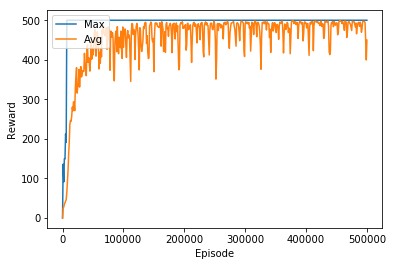

In [13]:
# TRANING
q_table, bins = Qtable(len(env.observation_space.low), env.action_space.n)
Q_learning(q_table, bins, lr = 0.1, gamma = 0.995, episodes = 2*10**5, timestep = 1000, epsilon = 0.1)